This notebook produces explanations using the coefficients of the SVC

In [1]:
import sys
import json
import pickle
import warnings
import numpy as np
import pandas as pd
sys.path.append('../')
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, f1_score

In [2]:
# load, clean and shape the data
train_data = pd.read_pickle('../data/explainability_input/train_data.pkl')
x_train_data = train_data.drop(columns=['id', 'date', 'cluster'])
test_data = pd.read_pickle('../data/explainability_input/test_data.pkl')
y_test_data = test_data['cluster']
x_test_data = test_data.drop(columns=['id', 'date', 'cluster'])

In [3]:
# load the model
with open('../models/svc.pkl', 'rb') as file:  
    model = pickle.load(file)

In [4]:
# evaluate the performance of the model which also indicates the quality of the exaplantions (coefficients) 
predictions = model.predict(x_test_data)
accuracy = accuracy_score(y_test_data, predictions)
f1 = f1_score(y_test_data, predictions, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9983502705556289
F1 Score: 0.9983502987473539


In [5]:
# extract coefficients and intercept
coefficients = model.coef_[0].tolist()
intercept = model.intercept_
# these explanations are global so they are the same for all instances
print('Features coefficients:', coefficients)
print('Features intercept:', intercept)

Features coefficients: [8.500879448235267, 5.017067714653825, 12.645443891434638, 0.9048213234293243, -0.061258321819535055, 1.396713111066818, -3.598500664667256, -0.16229511679091663, 1.7382883244315153, 11.978794194612377, 3.6896414507930793, -15.933498917218884, -0.17482928760397343, -0.03438579180968451, 6.655460077263399, 0.0, 0.026056011302193482]
Features intercept: [-7.96798485]


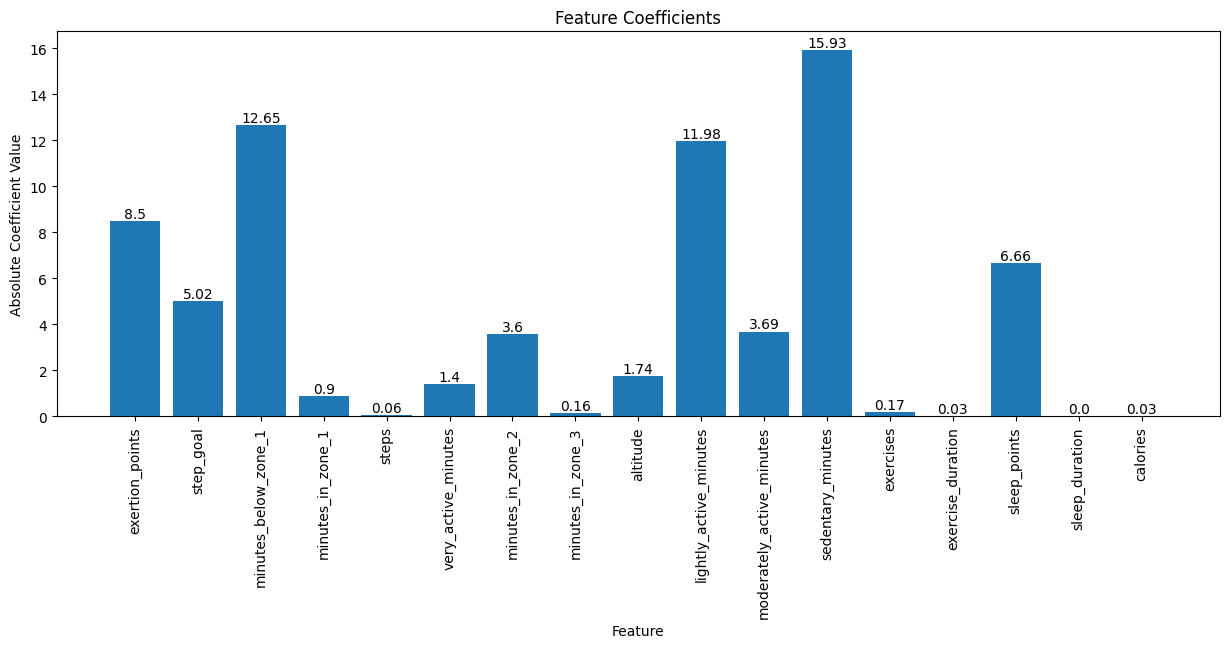

In [7]:
# visualize the absolute coefficients - absolute impact on decision boundary
plt.figure(figsize=(15, 5))
bars = plt.bar(model.feature_names_in_ , np.abs(coefficients))
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Coefficients')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
             va='bottom', ha='center')
plt.show()

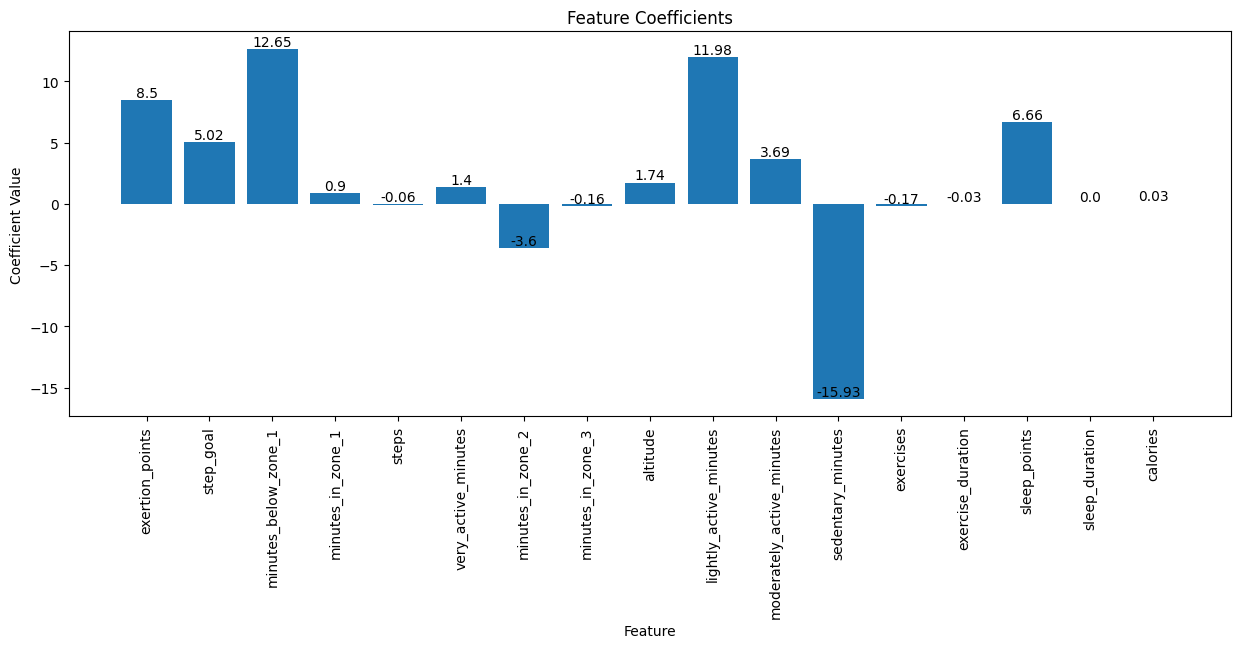

In [8]:
# visualize the absolute coefficients - actual impact on decision boundary
plt.figure(figsize=(15, 5))
bars = plt.bar(model.feature_names_in_ , coefficients)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
             va='bottom', ha='center')
plt.show()

In [9]:
# create a datafame with the features and their coefficients
df = pd.DataFrame({'feature': list(model.feature_names_in_), 'value': coefficients})
# extract the global coefficients explanations
df_indexed = df.set_index('feature')
json_result = df_indexed['value'].to_dict()
with open('../data/explainability_output/global_coefficients.json', 'w') as f:
    json.dump(json_result, f, indent=4)